In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel("Pizza Sales.xlsx")
df

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [4]:
df.shape

(48620, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


In [6]:
df["pizza_size"] = df["pizza_size"].astype("category")
df["pizza_category"] = df["pizza_category"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  category      
 9   pizza_category     48620 non-null  category      
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: category(2), datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 3.8+ MB


In [7]:
# checking for missing values
df.isnull().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [8]:
# checking for duplicates
df.duplicated().sum()

0

#### Feature Engg.

In [9]:
# extracting days, months from order_date and hours from order_time
df["order_month_num"] = df["order_date"].dt.month
df["order_month"] = df["order_date"].dt.month_name()
df["order_day"] = df["order_date"].dt.day_name()

# for extracting hours from order_time which is python's time object, convert order_time into string and then split on the basis of  ":"
# and extract the hour
df["order_hour"] = df["order_time"].apply(str).str.split(":").str.get(0).astype("int")

# based on the hour, creating a new feature day_tim
def day_time(hour):
    if hour < 12:
        return "Morning"
    elif hour >= 12 and hour < 17:
        return "Afternoon"
    elif hour >= 17 and hour < 21:
        return "Evening"
    else:
        return "Night"

df["order_day_time"] = df.order_hour.apply(day_time)

df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,order_month_num,order_month,order_day,order_hour,order_day_time
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,1,January,Thursday,11,Morning
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,1,January,Thursday,11,Morning
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,1,January,Thursday,11,Morning
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,1,January,Thursday,11,Morning
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,1,January,Thursday,11,Morning


In [77]:
print(f"Total Revenue : ${df.total_price.sum()}")
print(f"Total Orders : {df.order_id.drop_duplicates().count()}")
print(f"Total Pizzas Sold : {df.quantity.sum()}")

Total Revenue : $817860.05
Total Orders : 21350
Total Pizzas Sold : 49574


0.4761904761904762

### Overall Monthly Trend of Revenue

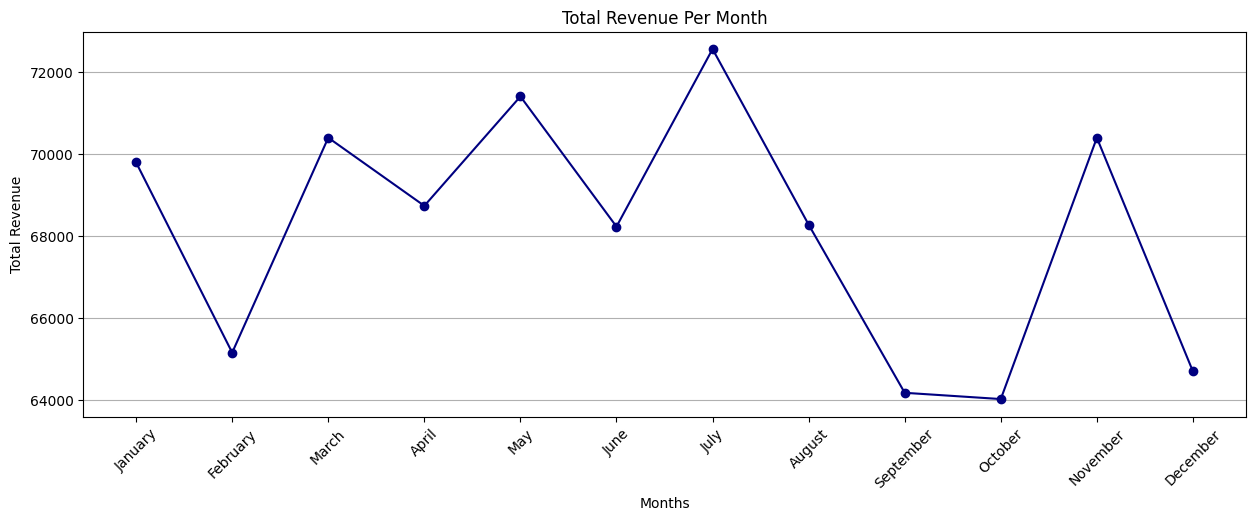

In [11]:
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

monthly_sales = df.groupby("order_month_num")["total_price"].sum().reset_index()

plt.figure(figsize=(15, 5))

plt.plot(monthly_sales["order_month_num"],
         monthly_sales["total_price"],
         marker="o",
         c="navy"
)

plt.xlabel("Months")
plt.ylabel("Total Revenue")
plt.title("Total Revenue Per Month")
plt.grid(axis="y")
plt.xticks(np.arange(1, 13), month_order, rotation=45)

plt.show()

#### Insights
- Majority of the monthly revenue lies in the range of $66000 to $72000.
- Highest Revenue earned in the month of July and lowest in October.
- In Spring Season revenue are generated more than in any other season.
- In Autumn Season sales are lowest.

### Overall Daily Trend of Revenue

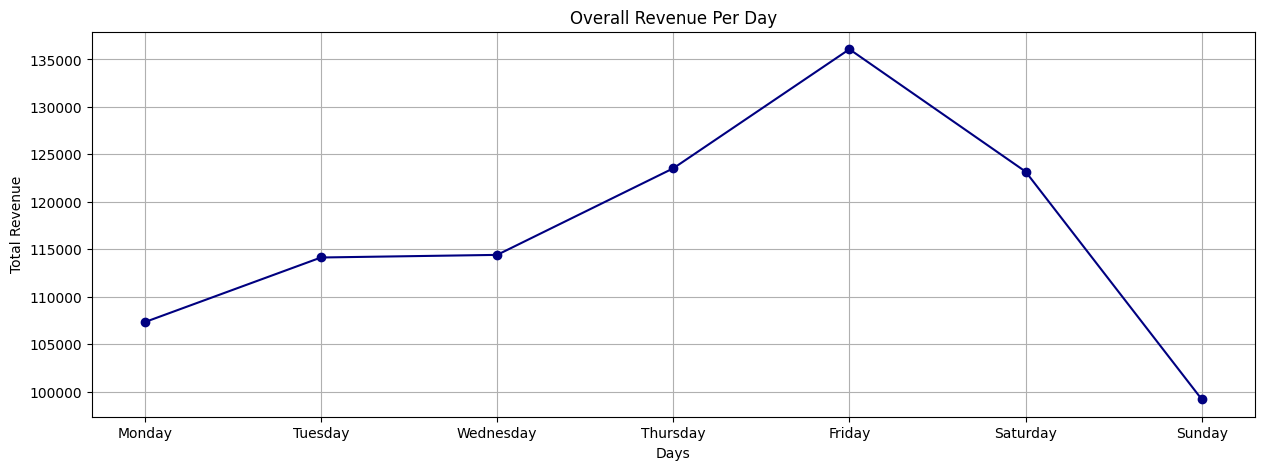

In [12]:
overall_daily_sales = df.groupby("order_day")["total_price"].sum().reset_index()
overall_daily_sales["day_num"] = [5, 1, 6, 7, 4, 2, 3]
overall_daily_sales = overall_daily_sales.sort_values(by="day_num", ascending=True)

plt.figure(figsize=(15, 5))

plt.plot(overall_daily_sales["order_day"],
         overall_daily_sales["total_price"],
         color="navy",
         marker="o"
)

plt.xlabel("Days")
plt.ylabel("Total Revenue")
plt.title("Overall Revenue Per Day")
plt.grid(True)
plt.show()

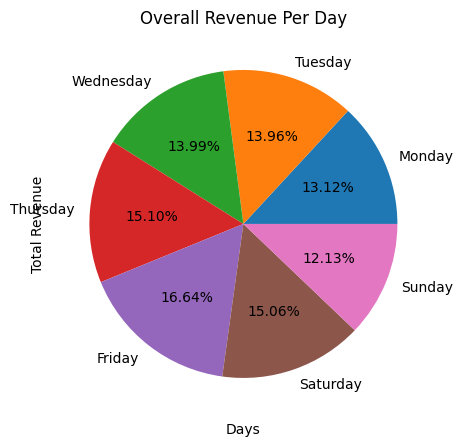

In [13]:
plt.figure(figsize=(15, 5))

plt.pie(x=overall_daily_sales["total_price"],
         labels=overall_daily_sales["order_day"],
         autopct="%.2f%%"
)

plt.xlabel("Days")
plt.ylabel("Total Revenue")
plt.title("Overall Revenue Per Day")
plt.show()

#### Insights
- Maximum Revenue generated on Friday and min on Sunday.
- Sales increases from Mon to Fri and then decreases in weekends.

### Overall Revenue day-wise

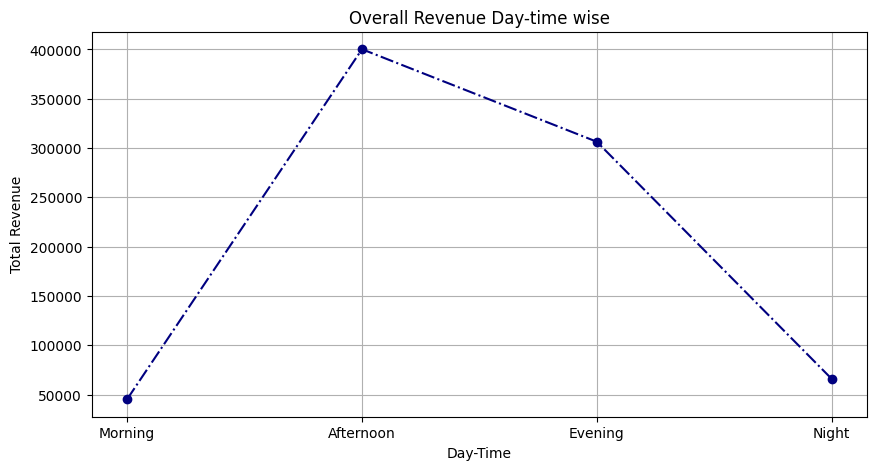

In [14]:
overall_day_wise_qty_sold = df.groupby("order_day_time")["total_price"].sum().reset_index()
overall_day_wise_qty_sold["day_time_num"] = [2, 3, 1, 4]
overall_day_wise_qty_sold = overall_day_wise_qty_sold.sort_values(by="day_time_num", ascending=True)

plt.figure(figsize=(10, 5))

plt.plot(overall_day_wise_qty_sold["order_day_time"],
         overall_day_wise_qty_sold["total_price"],
         color="navy",
         marker="o",
         linestyle="-."
)

plt.xlabel("Day-Time")
plt.ylabel("Total Revenue")
plt.title("Overall Revenue Day-time wise")
plt.grid(True)
plt.show()

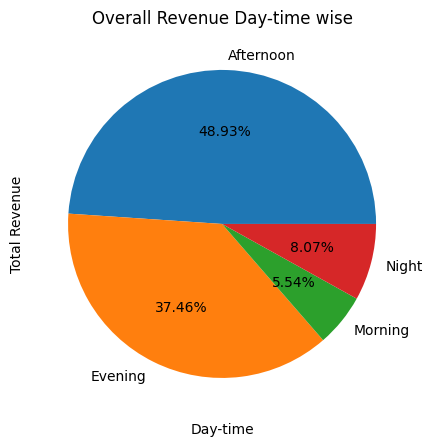

In [15]:
overall_day_wise_qty_sold = df.groupby("order_day_time")["total_price"].sum().reset_index()

plt.figure(figsize=(15, 5))

plt.pie(x=overall_day_wise_qty_sold["total_price"],
         labels=overall_day_wise_qty_sold["order_day_time"],
         autopct="%.2f%%"
)

plt.xlabel("Day-time")
plt.ylabel("Total Revenue")
plt.title("Overall Revenue Day-time wise")
plt.show()

### Hourly Trend of Revenue

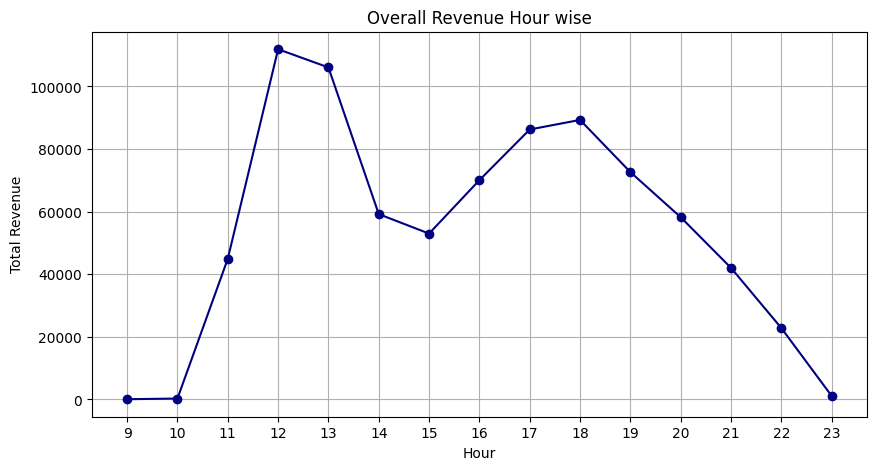

In [16]:
hourly_sales = df.groupby("order_hour")["total_price"].sum().reset_index()

plt.figure(figsize=(10, 5))

plt.plot(hourly_sales["order_hour"],
         hourly_sales["total_price"],
         color="navy",
         marker="o",
)

plt.xlabel("Hour")
plt.ylabel("Total Revenue")
plt.title("Overall Revenue Hour wise")
plt.xticks(ticks=np.arange(9, 24))
plt.grid(True)
plt.show()

<Axes: title={'center': 'Overall Revenue Hour wise'}>

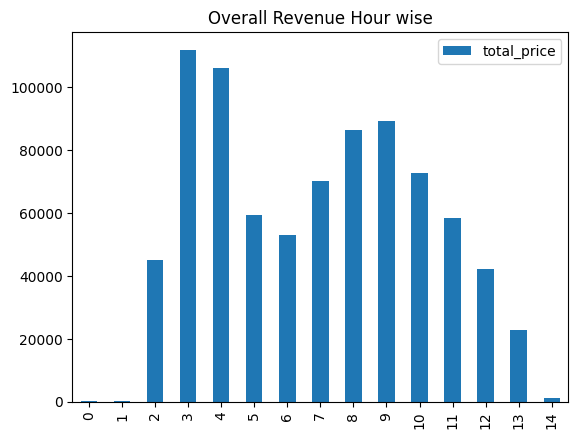

In [17]:
hourly_sales.plot(kind="bar", title="Overall Revenue Hour wise", y="total_price")

### Monthly Trend of Quantity Sold

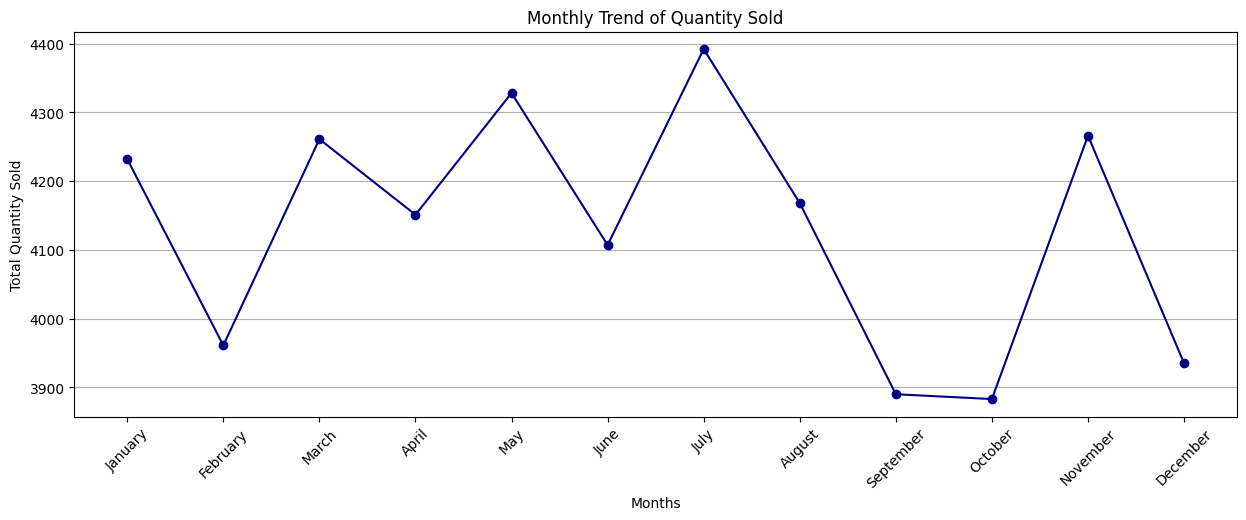

In [18]:
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

monthly_qty_sold = df.groupby("order_month_num")["quantity"].sum().reset_index()

plt.figure(figsize=(15, 5))

plt.plot(monthly_qty_sold["order_month_num"],
         monthly_qty_sold["quantity"],
         marker="o",
         c="navy"
)

plt.xlabel("Months")
plt.ylabel("Total Quantity Sold")
plt.title("Monthly Trend of Quantity Sold")
plt.grid(axis="y")
plt.xticks(np.arange(1, 13), month_order, rotation=45)

plt.show()

### Overall Daily Trend of Quantity Sold

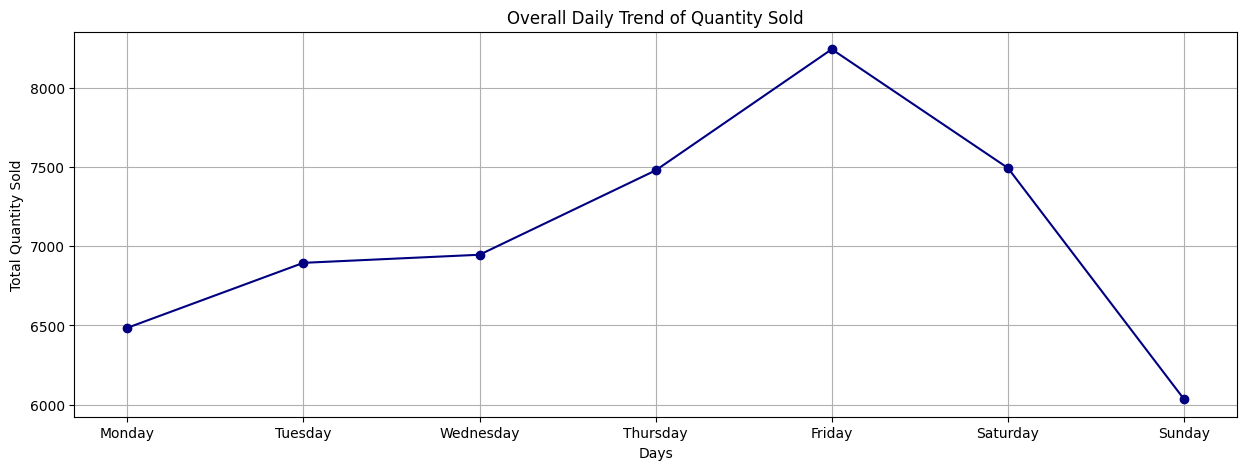

In [19]:
overall_daily_qty_sold = df.groupby("order_day")["quantity"].sum().reset_index()
overall_daily_qty_sold["day_num"] = [5, 1, 6, 7, 4, 2, 3]
overall_daily_qty_sold = overall_daily_qty_sold.sort_values(by="day_num", ascending=True)

plt.figure(figsize=(15, 5))

plt.plot(overall_daily_qty_sold["order_day"],
         overall_daily_qty_sold["quantity"],
         color="navy",
         marker="o"
)

plt.xlabel("Days")
plt.ylabel("Total Quantity Sold")
plt.title("Overall Daily Trend of Quantity Sold")
plt.grid(True)
plt.show()

### Overall Quantity day-wise

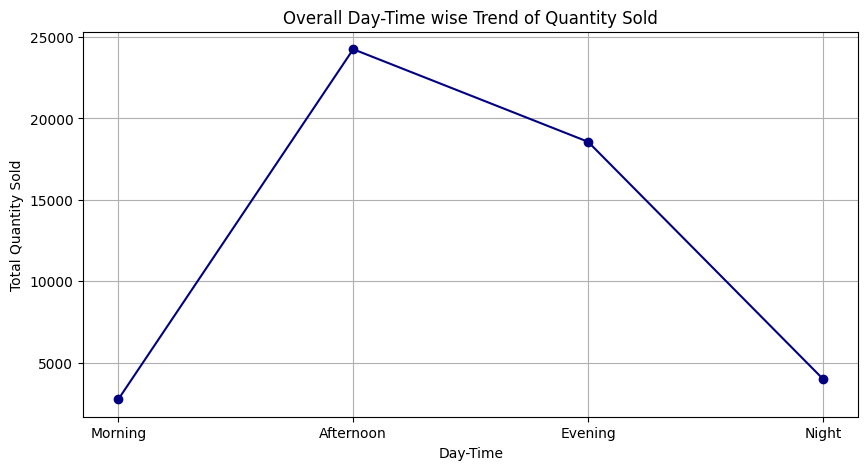

In [20]:
overall_day_wise_qty_sold = df.groupby("order_day_time")["quantity"].sum().reset_index()
overall_day_wise_qty_sold["day_time_num"] = [2, 3, 1, 4]
overall_day_wise_qty_sold = overall_day_wise_qty_sold.sort_values(by="day_time_num", ascending=True)

plt.figure(figsize=(10, 5))

plt.plot(overall_day_wise_qty_sold["order_day_time"],
         overall_day_wise_qty_sold["quantity"],
         color="navy",
         marker="o"
)

plt.xlabel("Day-Time")
plt.ylabel("Total Quantity Sold")
plt.title("Overall Day-Time wise Trend of Quantity Sold")
plt.grid(True)
plt.show()

### Overall Quantity Sold Hour wise

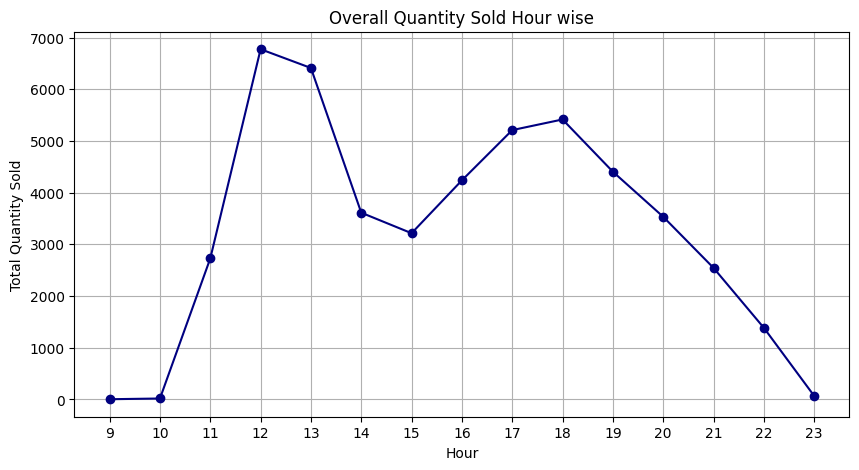

In [21]:
hourly_qty_sold = df.groupby("order_hour")["quantity"].sum().reset_index()

plt.figure(figsize=(10, 5))

plt.plot(hourly_qty_sold["order_hour"],
         hourly_qty_sold["quantity"],
         color="navy",
         marker="o",
)

plt.xlabel("Hour")
plt.ylabel("Total Quantity Sold")
plt.title("Overall Quantity Sold Hour wise")
plt.xticks(ticks=np.arange(9, 24))
plt.grid(True)
plt.show()

### Monthly Trend of Orders

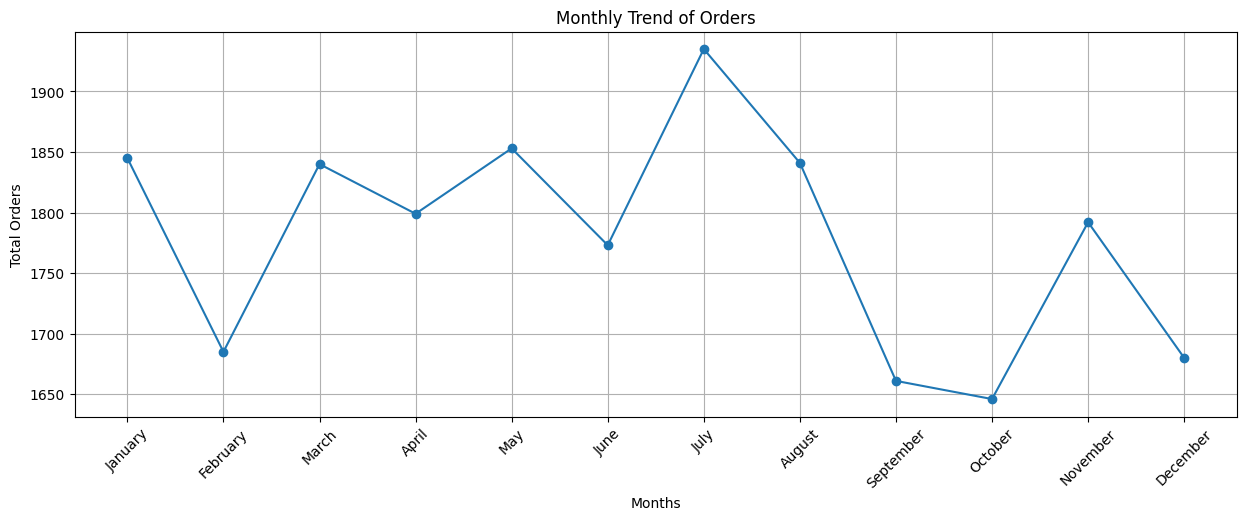

In [22]:
monthly_qty_sold = df.groupby("order_month_num")["order_id"].nunique().reset_index()

plt.figure(figsize=(15, 5))

plt.plot(monthly_qty_sold["order_month_num"],
         monthly_qty_sold["order_id"],
         marker="o",
)

plt.xlabel("Months")
plt.ylabel("Total Orders")
plt.title("Monthly Trend of Orders")
plt.grid(True)
plt.xticks(np.arange(1, 13), month_order, rotation=45)

plt.show()

### Overall Daily Trend of Orders

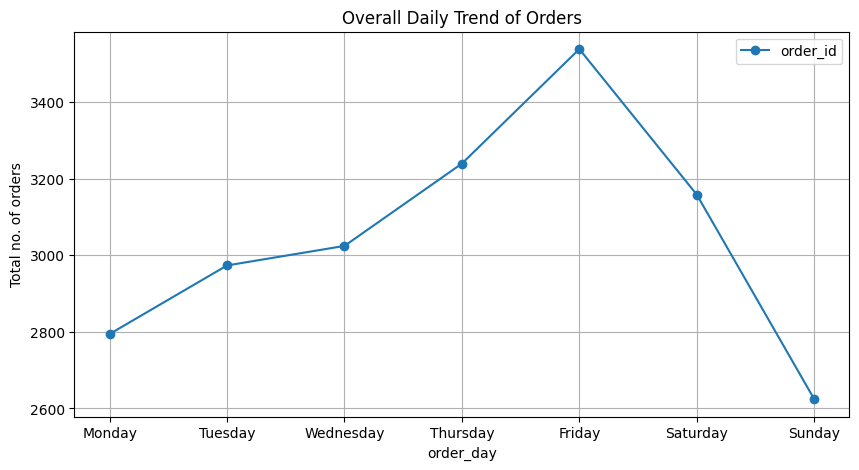

In [23]:
overall_daily_orders = df.groupby("order_day")["order_id"].nunique().reset_index()
overall_daily_orders["day_num"] = [5, 1, 6, 7, 4, 2, 3]
overall_daily_orders.sort_values(by="day_num", ascending=True, inplace=True)
overall_daily_orders.plot(kind="line", marker="o", figsize=(10, 5), y="order_id", x="order_day", ylabel="Total no. of orders")
plt.grid(True)
plt.title("Overall Daily Trend of Orders")
plt.show()

### Overall Day-Time wise Trend of Orders

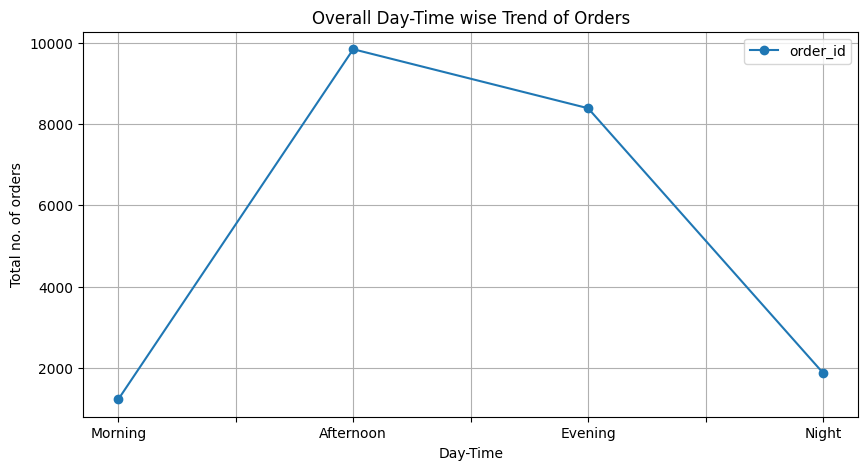

In [24]:
overall_day_wise_orders = df.groupby("order_day_time")["order_id"].nunique().reset_index()
overall_day_wise_orders["day_time_num"] = [2, 3, 1, 4]
overall_day_wise_orders = overall_day_wise_orders.sort_values(by="day_time_num", ascending=True)

overall_day_wise_orders.plot(kind="line", marker="o", figsize=(10, 5), y="order_id", x="order_day_time", ylabel="Total no. of orders",xlabel="Day-Time")
plt.grid(True)
plt.title("Overall Day-Time wise Trend of Orders")
plt.show()

### Overall Quantity Sold Hour wise

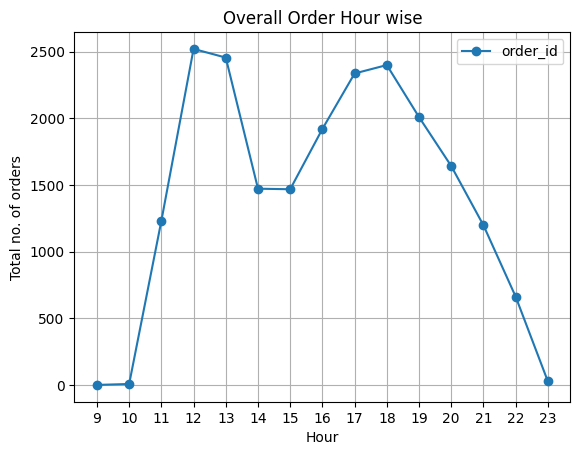

In [25]:
hourly_orders = df.groupby("order_hour")["order_id"].nunique().reset_index()
hourly_orders.plot(kind="line", y="order_id", x="order_hour", xlabel="Hour", ylabel="Total no. of orders", marker="o")
plt.title("Overall Order Hour wise")
plt.grid(True)
plt.xticks(np.arange(9, 24))
plt.show()

#### Insights
- The trends of quantity and orders is same as of revenue.
- Quantity of Pizzas sold and total number of orders placed is highest on Friday.
- Quantity of Pizzas sold and total number of orders placed is maximum at Afternoon (at 12 & 13 hour) and at Evening (at 17 & 18 hour).
- In Business days busiest days are Friday and Thursday.
- In Weekends busiest day is Saturday.
- In Morning busiest hour : 11
- In Afternoon busiest hours : 12 and 13
- In Evening busiest hours : 17 and 18
- In Night busiest hour : 22

### Percentage of Contribution of each pizza category in Revenue

C:\Users\ADITYA\AppData\Local\Temp\ipykernel_20164\536681418.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("pizza_category")["total_price"].sum().plot(kind="pie", autopct="%.2f%%", title="Percentage of Contribution of each pizza category in Revenue")


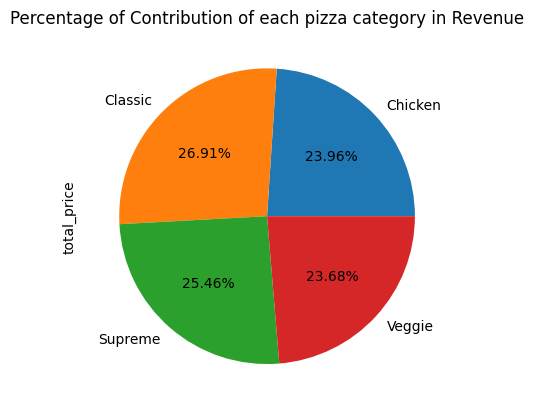

In [26]:
df.groupby("pizza_category")["total_price"].sum().plot(kind="pie", autopct="%.2f%%", title="Percentage of Contribution of each pizza category in Revenue")
plt.show()

### Total Quantity Sold in each category

C:\Users\ADITYA\AppData\Local\Temp\ipykernel_20164\3218892425.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("pizza_category")["quantity"].sum().plot(kind="bar", title="Total Quantity Sold in each category")


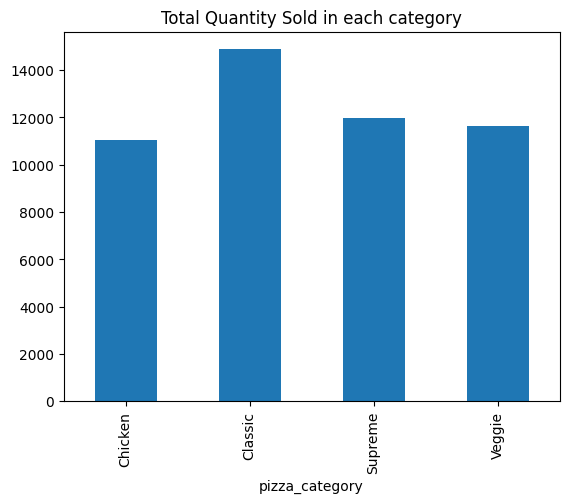

In [27]:
df.groupby("pizza_category")["quantity"].sum().plot(kind="bar", title="Total Quantity Sold in each category")
plt.show()

### Total Orders per pizza category

C:\Users\ADITYA\AppData\Local\Temp\ipykernel_20164\848592915.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("pizza_category")["order_id"].nunique().plot(kind="bar", title="Total Orders per pizza category")


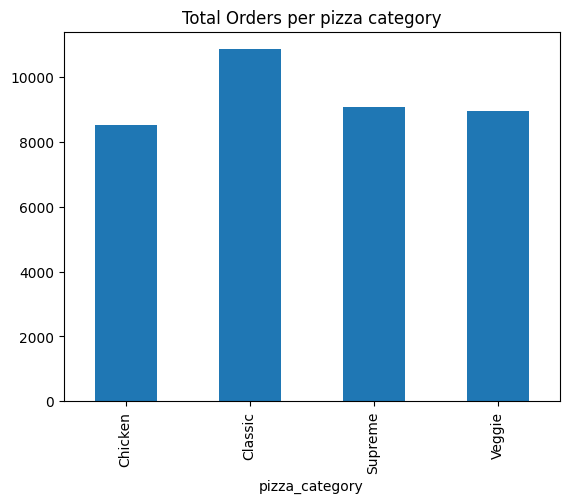

In [94]:
df.groupby("pizza_category")["order_id"].nunique().plot(kind="bar", title="Total Orders per pizza category")
plt.show()

#### Insights
- Every category had contributed almost equally in total revenue.
- Classic holds the contribute highest in revenue approx. 27% and Veggie the lowest approx. 24%.
- Most sold and ordered pizzas are from classic category and lowest from chicken category.

### Percentage of Contribution of Revenue by Size

C:\Users\ADITYA\AppData\Local\Temp\ipykernel_20164\706838028.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("pizza_size")["total_price"].sum().plot(kind="pie", autopct="%.2f%%", title="Percentage of Contribution of each pizza size in Revenue")


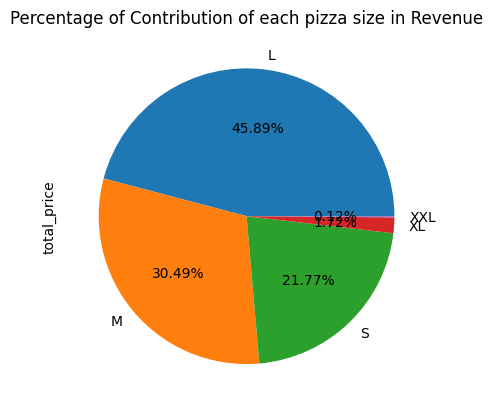

In [70]:
df.groupby("pizza_size")["total_price"].sum().plot(kind="pie", autopct="%.2f%%", title="Percentage of Contribution of each pizza size in Revenue")
plt.show()

### Total Quantity sold by Size

C:\Users\ADITYA\AppData\Local\Temp\ipykernel_20164\4180278365.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("pizza_size")["quantity"].sum().plot(kind="bar", title="Top Quantity Sold of each size pizza")


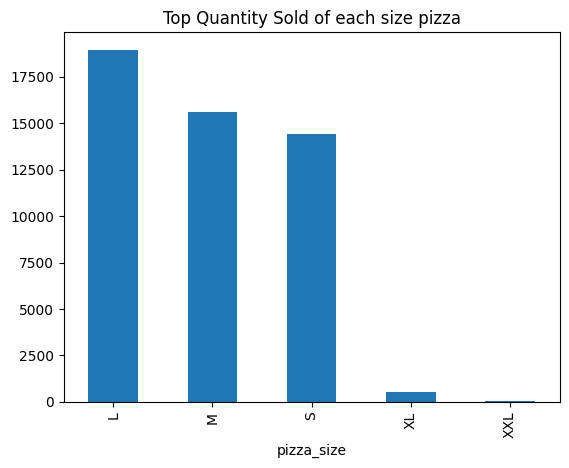

In [71]:
df.groupby("pizza_size")["quantity"].sum().plot(kind="bar", title="Top Quantity Sold of each size pizza")
plt.show()

### Total Orders of each size pizza

C:\Users\ADITYA\AppData\Local\Temp\ipykernel_20164\3301896769.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("pizza_size")["order_id"].nunique().plot(kind="bar", title="Total Orders of each size pizza")


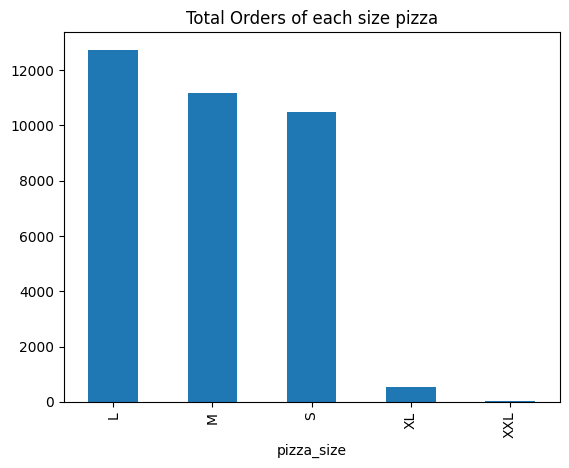

In [73]:
df.groupby("pizza_size")["order_id"].nunique().plot(kind="bar", title="Total Orders of each size pizza")
plt.show()

#### Insights
- L size contributes almost 46% in total revenue.
- L holds the contribute highest in revenue approx. 46% and XXL the lowest approx. 0.12%.
- Most sold and ordered pizzas are of L size and lowest from XXL size.

### Most Selling Pizzas

#### Top 5 Pizzas by Revenue

pizza_name
The Thai Chicken Pizza          43434.25
The Barbecue Chicken Pizza      42768.00
The California Chicken Pizza    41409.50
The Classic Deluxe Pizza        38180.50
The Spicy Italian Pizza         34831.25
Name: total_price, dtype: float64


<Axes: ylabel='pizza_name'>

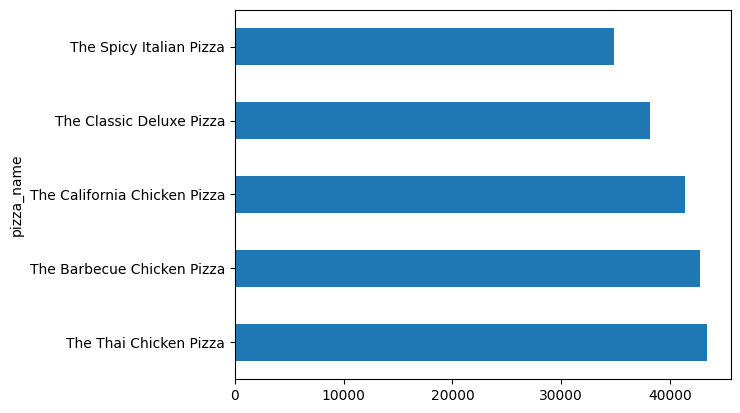

In [28]:
print(df.groupby("pizza_name")["total_price"].sum().sort_values(ascending=False).head())
df.groupby("pizza_name")["total_price"].sum().sort_values(ascending=False).head().plot(kind="barh")

#### Top 5 Pizzas by Quantity

pizza_name
The Classic Deluxe Pizza      2416
The Barbecue Chicken Pizza    2372
The Hawaiian Pizza            2370
The Pepperoni Pizza           2369
The Thai Chicken Pizza        2315
Name: quantity, dtype: int64


<Axes: ylabel='pizza_name'>

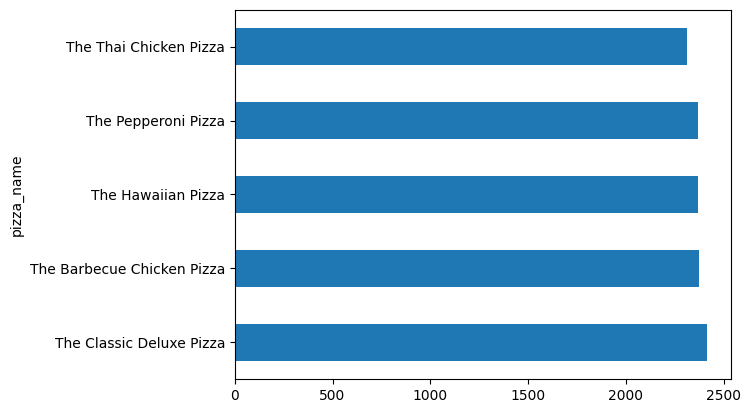

In [29]:
print(df.groupby("pizza_name")["quantity"].count().sort_values(ascending=False).head())
df.groupby("pizza_name")["quantity"].count().sort_values(ascending=False).head().plot(kind="barh")

#### Top 5 Pizzas by Total Orders

<Axes: title={'center': 'Top 5 Pizzas by Total Orders'}, xlabel='pizza_name'>

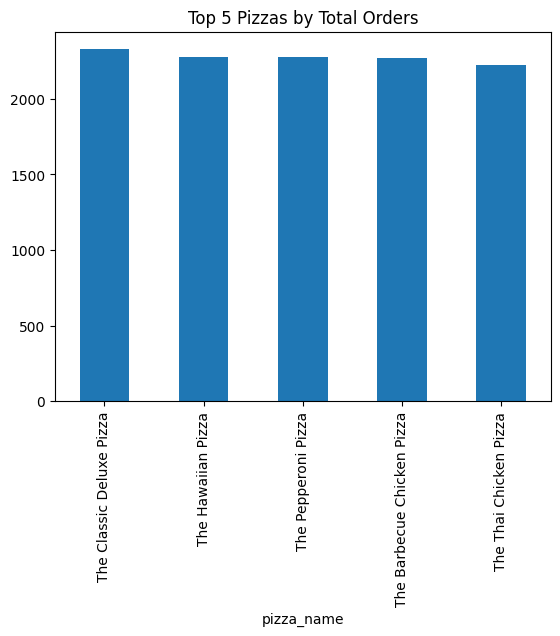

In [30]:
df.groupby("pizza_name")["order_id"].nunique().sort_values(ascending=False).head().plot(kind="bar", title="Top 5 Pizzas by Total Orders")

### Worst Selling Pizzas

#### Bottom 5 Pizzas by Revenue

pizza_name
The Brie Carre Pizza         11588.50
The Green Garden Pizza       13955.75
The Spinach Supreme Pizza    15277.75
The Mediterranean Pizza      15360.50
The Spinach Pesto Pizza      15596.00
Name: total_price, dtype: float64


<Axes: ylabel='pizza_name'>

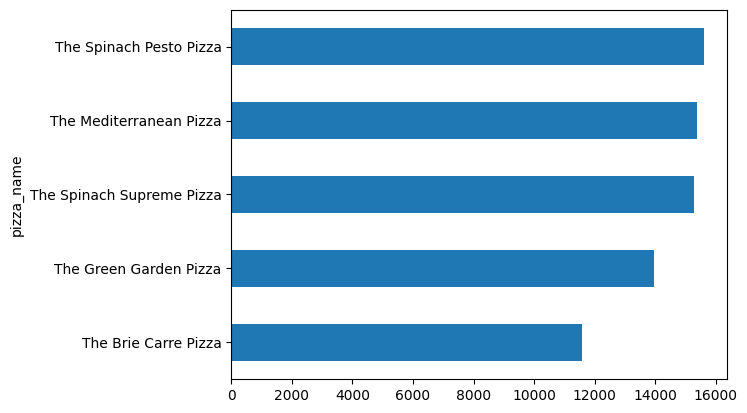

In [31]:
print(df.groupby("pizza_name")["total_price"].sum().sort_values(ascending=True).head())
df.groupby("pizza_name")["total_price"].sum().sort_values(ascending=True).head().plot(kind="barh")

#### Bottom 5 Pizzas by Quantity

pizza_name
The Brie Carre Pizza         480
The Mediterranean Pizza      923
The Calabrese Pizza          927
The Spinach Supreme Pizza    940
The Soppressata Pizza        957
Name: quantity, dtype: int64


<Axes: ylabel='pizza_name'>

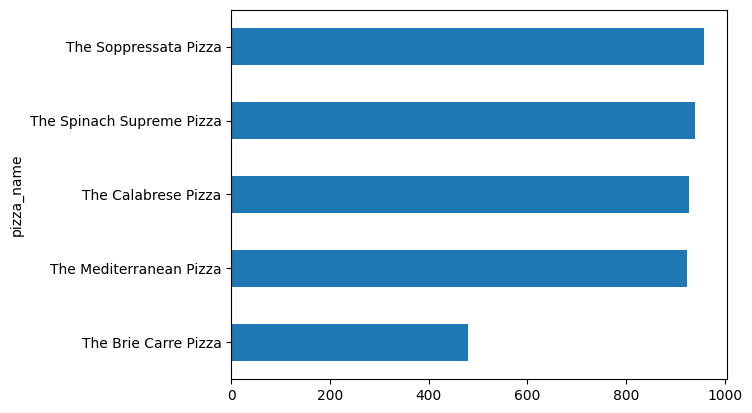

In [32]:
print(df.groupby("pizza_name")["quantity"].count().sort_values(ascending=True).head())
df.groupby("pizza_name")["quantity"].count().sort_values(ascending=True).head().plot(kind="barh")

#### Bottom 5 Pizzas by Total Orders

<Axes: title={'center': 'Top 5 Pizzas by Total Orders'}, ylabel='pizza_name'>

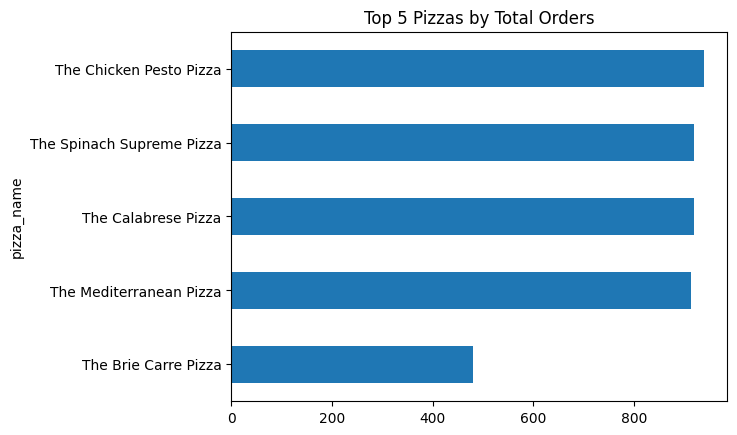

In [33]:
df.groupby("pizza_name")["order_id"].nunique().sort_values(ascending=True).head().plot(kind="barh", title="Top 5 Pizzas by Total Orders")

### Total no. of Pizzas made in Peak hours

In [34]:
temp_df = df[df["order_hour"].isin([11, 12, 13, 17, 18, 22])]

temp_df.pivot_table(index="order_day", columns="order_hour", values="quantity", aggfunc="sum")

order_hour,11,12,13,17,18,22
order_day,,,,,,
Friday,388,1101,1040,759,936,381
Monday,472,1126,803,712,666,112
Saturday,208,633,794,729,881,343
Sunday,232,604,689,714,732,143
Thursday,468,1149,1131,856,807,113
Tuesday,426,1105,1018,669,639,148
Wednesday,534,1058,938,772,756,146


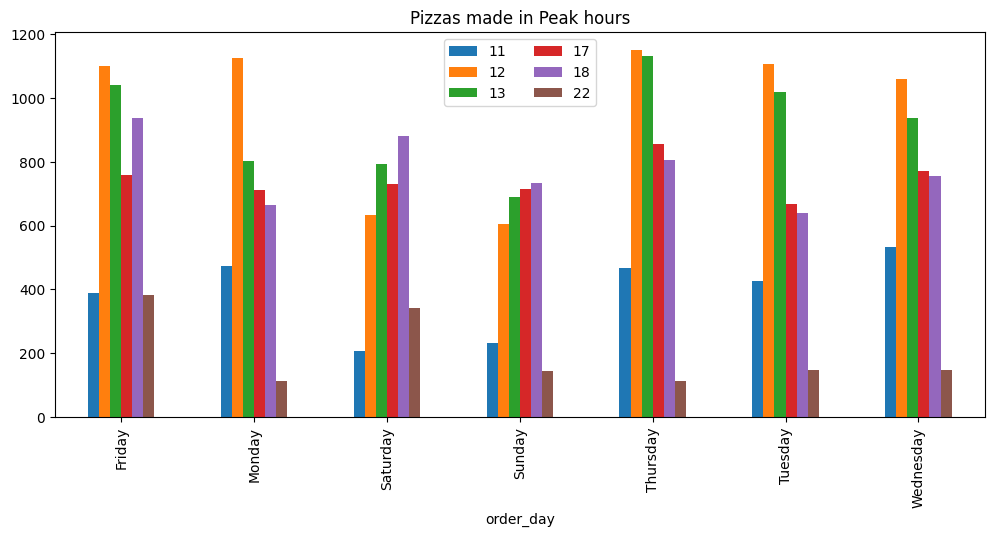

In [35]:
temp_df.pivot_table(index="order_day", columns="order_hour", values="quantity", aggfunc="sum").plot(kind="bar", figsize=(12, 5), title="Pizzas made in Peak hours")
plt.legend(ncols=2)

### Top 5 Pizzas sold in busiest hours

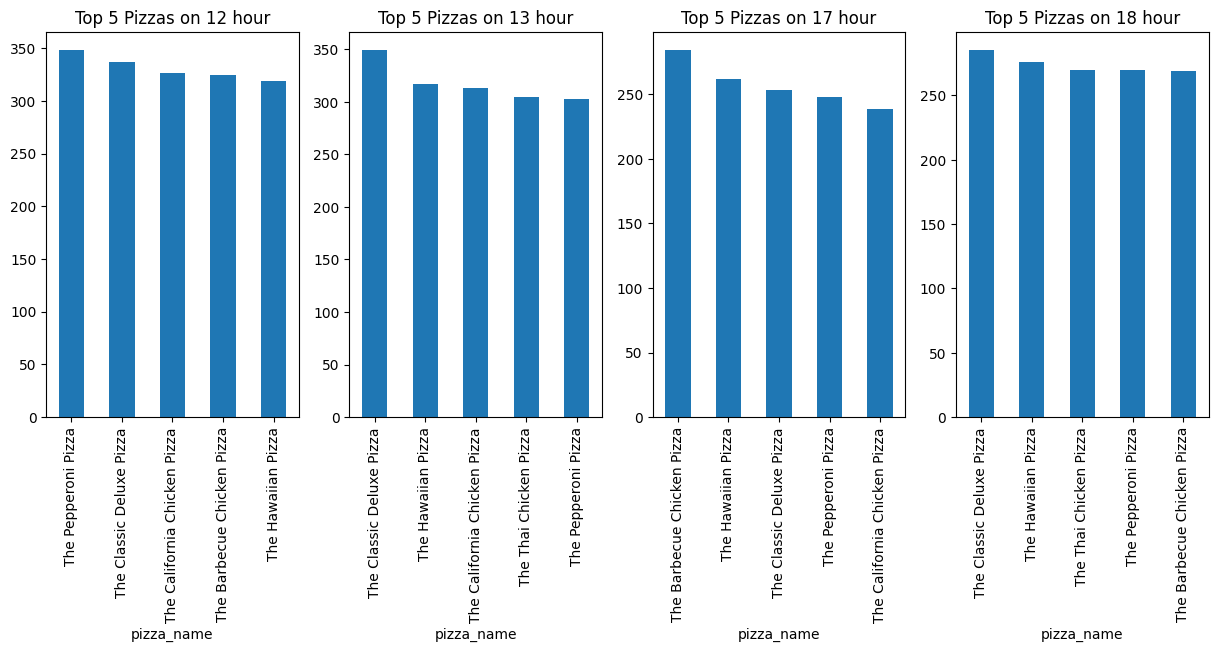

In [68]:
busiest_hours = [12, 13, 17, 18]

fig, ax = plt.subplots(1, 4, figsize=(15, 5))

for i in range(4):
    temp_df[temp_df.order_hour == busiest_hours[i]].groupby("pizza_name")["quantity"].sum().sort_values(ascending=False).head(5).plot(kind="bar", ax=ax[i], title=f"Top 5 Pizzas on {busiest_hours[i]} hour")

### 🪑 Seating Capacity Utilization Analysis

### 🔧 Assumptions

- **Average number of customers per day**: 133  
- **Average number of customers per order**: 2  
- **Average time spent per customer**: 0.5 hours  
- **Restaurant operating hours per day**: 14 hours  
- **Total seats available**: 60  

---

### 📊 Calculations

1. **Seat turnover per day**  
   $$
   \text{Seat uses per seat per day} = \frac{14\ \text{hours}}{0.5\ \text{hours per customer}} = 28
   $$

2. **Maximum seating capacity per day**  
   $$
   28\ \text{seat uses per seat} \times 60\ \text{seats} = 1680\ \text{seat uses}
   $$

3. **Actual seats used per day**  
   $$
   \text{Total customers per day} = 133
   $$

4. **Seating Utilization**  
   $$
   \text{Utilization (\%)} = \left( \frac{133}{1680} \right) \times 100 \approx \boxed{7.9\%}
   $$

---

### 📌 Conclusion

We are currently utilizing only **~7.9%** of our total seating capacity on average.  
This indicates significant unused space in the restaurant, suggesting opportunities to:

- Improve marketing or run promotional offers
- Optimize seating turnover during off-peak hours
